# Проверка гипотез по увеличению выручки в интернет-магазине — оценка результатов A/B теста

# Описание проекта
Я — аналитик крупного интернет-магазина. Вместе с отделом маркетинга мы подготовили список гипотез для увеличения выручки.

# Описание данных

Данные для первой части:

Файл /datasets/hypothesis.csv.

Hypothesis — краткое описание гипотезы;

Reach — охват пользователей по 10-балльной шкале;

Impact — влияние на пользователей по 10-балльной шкале;

Confidence — уверенность в гипотезе по 10-балльной шкале;

Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.

Данные для второй части

Файл /datasets/orders.csv.

transactionId — идентификатор заказа;

visitorId — идентификатор пользователя, совершившего заказ;

date — дата, когда был совершён заказ;

revenue — выручка заказа;

group — группа A/B-теста, в которую попал заказ.

Файл /datasets/visitors.csv.

date — дата;

group — группа A/B-теста;

visitors — количество пользователей в указанную дату в указанной группе A/B-теста

# Задача

Используя данные интернет-магазина приоритезировать гипотезы, запустить A/B-тест и проанализировать результаты. 

## Приоритизация гипотез

### Предобработк данных

В файле /datasets/hypothesis.csv 9 гипотез по увеличению выручки интернет-магазина с указанными параметрами Reach, Impact, Confidence, Effort

In [1]:
# импортируем библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats
import warnings

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
pd.set_option('max_colwidth', 120) 
hypothesis

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


In [3]:
#напишем функцию для первичного анализа
def description(x):
    display('Получение общей информации о данных в таблице')
    display(x.info())
    display('Подсчёт пропусков в таблице')
    display(x.isna().sum())
    display('Статистические показатели таблицы')
    display(x.describe())
    display('Количество строк и столбцов')
    display(x.shape)
    display('Наличие дубликатов в таблице')
    display(x.duplicated().sum())

In [4]:
description(hypothesis)

'Получение общей информации о данных в таблице'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

'Подсчёт пропусков в таблице'

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

'Статистические показатели таблицы'

,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


'Количество строк и столбцов'

(9, 5)

'Наличие дубликатов в таблице'

0

In [5]:
# преобразование названий столбцов к нижнему регистру
hypothesis.columns = [a.lower() for a in hypothesis .columns]

В результате предобработки данных пропусков и дубликатов в данных не обнаружено, можно работать с ними дальше. Названия столбцов для удобства были приведены к нижнему регистру.

### Применение фреймворка ICE для приоритизации гипотез

In [6]:
hypothesis['ICE'] = (hypothesis.impact * hypothesis.confidence) / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день рождения",16.200000
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",13.333333
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",11.200000
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",8.000000
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",7.000000
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2.000000
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",1.333333
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",1.125000
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",1.000000


### Применение фреймворка RICE для приоритизации гипотез

In [7]:
hypothesis['RICE'] = hypothesis.reach * hypothesis.impact * hypothesis.confidence / hypothesis.efforts
hypothesis.loc[:, ['hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,hypothesis,RICE
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3.0


### Вывод:

Наиболее перспективные гипотезы ICE:

1. Запустить акцию, дающую скидку на товар в день рождения - 16.2
2. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей -	13.3
3. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - 11.2
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию - 8.0
5. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - 7.0

Наиболее перспективные гипотезы RICE:
1. Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок - 112.0
2. Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа - 56.0
3. Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей - 40.0
4. Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию - 40.0
5. Запустить акцию, дающую скидку на товар в день рождения - 16.2

Первые 5 гипотез совпадают и у ICE и у RICE, но в разной последовательности. Так как RICE включает в себя еще один параметр ('Reach'), то именно он оказал влияние на перестановку гипотез по степени приоритетности.

Гипотезы фреймворка RICE, наиболее приоритетны. Именно их рекомендуется использовать при проведении A/B-теста.

## Анализ A/B-теста

Получены результаты A/B-теста, которые описаны в файлах '/datasets/orders.csv' и '/datasets/visitors.csv'.

In [8]:
orders = pd.read_csv('/datasets/orders.csv')
orders.head(10)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
6,398296753,2900797465,2019-08-15,1860,B
7,2626614568,78758296,2019-08-15,1044,A
8,1576988021,295230930,2019-08-15,13710,A
9,1506739906,1882260405,2019-08-15,1855,B


In [9]:
visitors = pd.read_csv('/datasets/visitors.csv')
visitors.head(10)

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756
5,2019-08-06,A,667
6,2019-08-07,A,644
7,2019-08-08,A,610
8,2019-08-09,A,617
9,2019-08-10,A,406


In [10]:
#напишем функцию для первичного анализа
def description(x, y):
    display('Получение общей информации о данных в таблицах')
    display(x.info())
    display(y.info())
    display('Статистические показатели таблиц')
    display(x.describe())
    display(y.describe())
    display('Количество строк и столбцов')
    display(x.shape)
    display(y.shape)
    display('Наличие дубликатов в таблице')
    display(x.duplicated().sum())
    display(y.duplicated().sum())

In [11]:
description(orders, visitors)

'Получение общей информации о данных в таблицах'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

'Статистические показатели таблиц'

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1.197000e+03
mean,2.155621e+09,2.165960e+09,8.348006e+03
std,1.229085e+09,1.236014e+09,3.919113e+04
min,1.062393e+06,5.114589e+06,5.000000e+01
25%,1.166776e+09,1.111826e+09,1.220000e+03
50%,2.145194e+09,2.217985e+09,2.978000e+03
75%,3.237740e+09,3.177606e+09,8.290000e+03
max,4.293856e+09,4.283872e+09,1.294500e+06


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


'Количество строк и столбцов'

(1197, 5)

(62, 3)

'Наличие дубликатов в таблице'

0

0

In [12]:
# преобразование из строки в дату
def to_date(x):
    x['date'] = pd.to_datetime(x['date'])

to_date(orders)
to_date(visitors)

In [13]:
# общее количество заказов в обеих группах
orders.groupby('group').agg({'transactionId' : 'count'})

,transactionId
group,
A,557
B,640


In [14]:
# общее количество уникальных пользователей в обеих группах
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,503
B,586


In [15]:
# количество уникальных пользователей, которые оказались одновременно в обеих группах
u_visitors = orders.loc[:, ['visitorId', 'group']].drop_duplicates().drop(columns=['group'])
u_visitors.visitorId.duplicated().sum()

58

In [16]:
# удаляю дубликаты которые попали в обе группы
orders['visitorId'] = orders['visitorId'].drop_duplicates()
orders.groupby('group').agg({'visitorId' : 'nunique'})

,visitorId
group,
A,475
B,556


Общее количество заказов в группах не совпадает. В группе А в общем 557 заказов, в группе В - 640. В количестве уникальных пользователей также выявлены различия. В группе В на 83 уникальных пользователя больше. Кроме того, в группе А и группе В оказалось 58 пользователей одновременно. В резульате было принято решение удалить дубликаты которые попали в обе группы.

### Построение графика кумулятивной выручки по группам

In [17]:
# зададим параметры визуализации
sns.set(font_scale =2, style ='whitegrid', rc ={'figure.figsize':(20,8)})
%config InlineBackend.figure_format = 'retina'

In [18]:
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

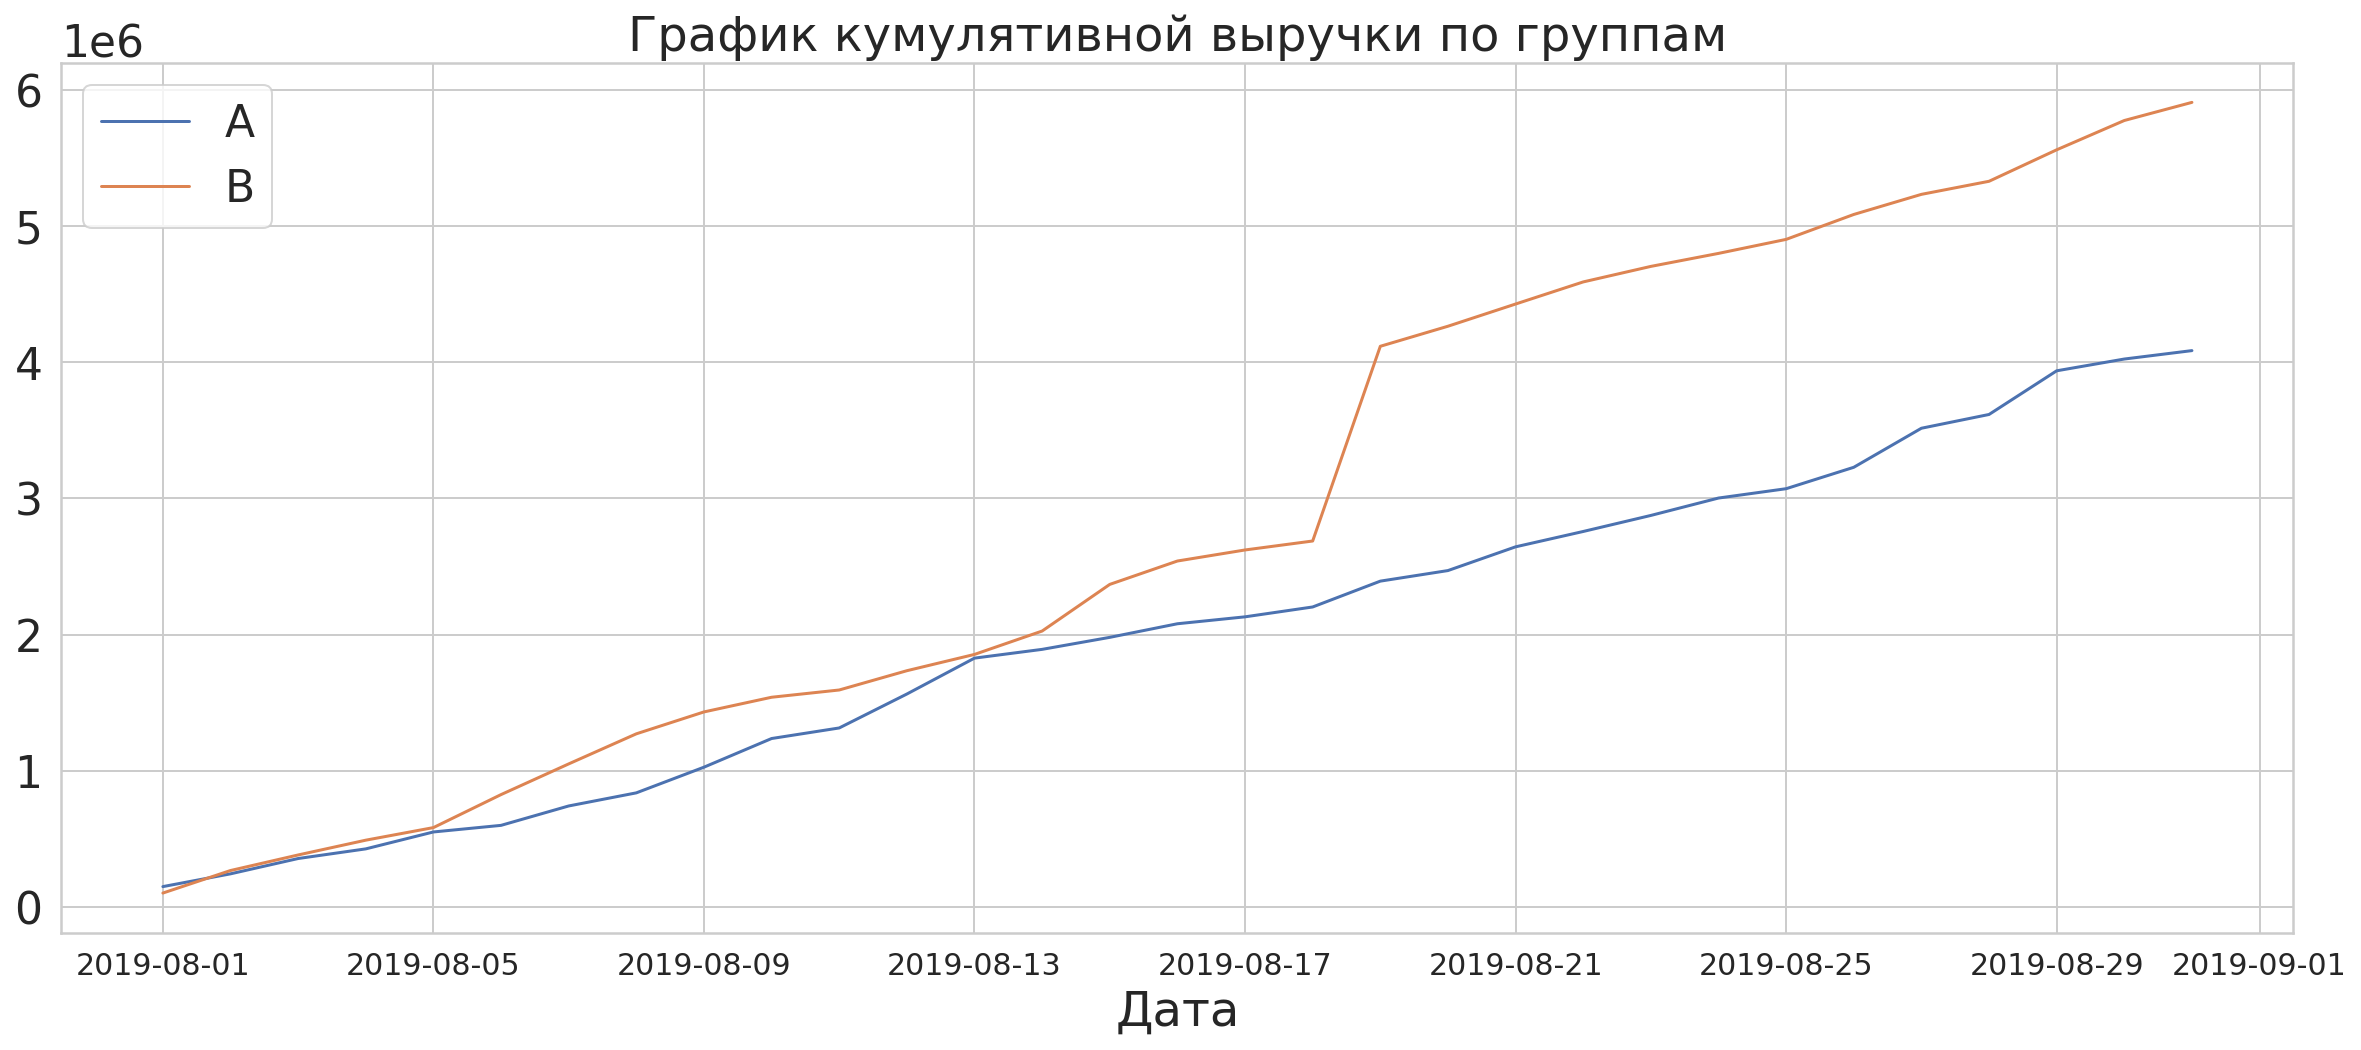

In [19]:
datesGroups = orders[['date', 'group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[
        np.logical_and(
            orders['date'] <= x['date'], orders['group'] == x['group']
        )
    ].agg(
        {
            'date': 'max',
            'group': 'max',
            'transactionId': 'nunique',
            'visitorId': 'nunique',
            'revenue': 'sum',
        }
    ),
    axis=1,
).sort_values(by=['date', 'group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[
        np.logical_and(
            visitors['date'] <= x['date'], visitors['group'] == x['group']
        )
    ].agg({'date': 'max', 'group': 'max', 'visitors': 'sum'}),
    axis=1,
).sort_values(by=['date', 'group'])

cumulativeData = ordersAggregated.merge(
    visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group']
)
cumulativeData.columns = [
    'date',
    'group',
    'orders',
    'buyers',
    'revenue',
    'visitors',
]

import matplotlib.pyplot as plt

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

# Строим график выручки группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')

# Строим график выручки группы B
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивной выручки по группам')
plt.xlabel('Дата')
plt.legend();

Выручка группы А росла весь месяц практически равномерно. Выручка группы В первые 5 дней была на одном уровне с группой А, после начала лидировать. 18 августа выручка группы В резко подскочила вверх, скорее всего выросло количество заказов или количество дорогих товаров в заказе.

### Построение графика кумулятивного среднего чека по группам

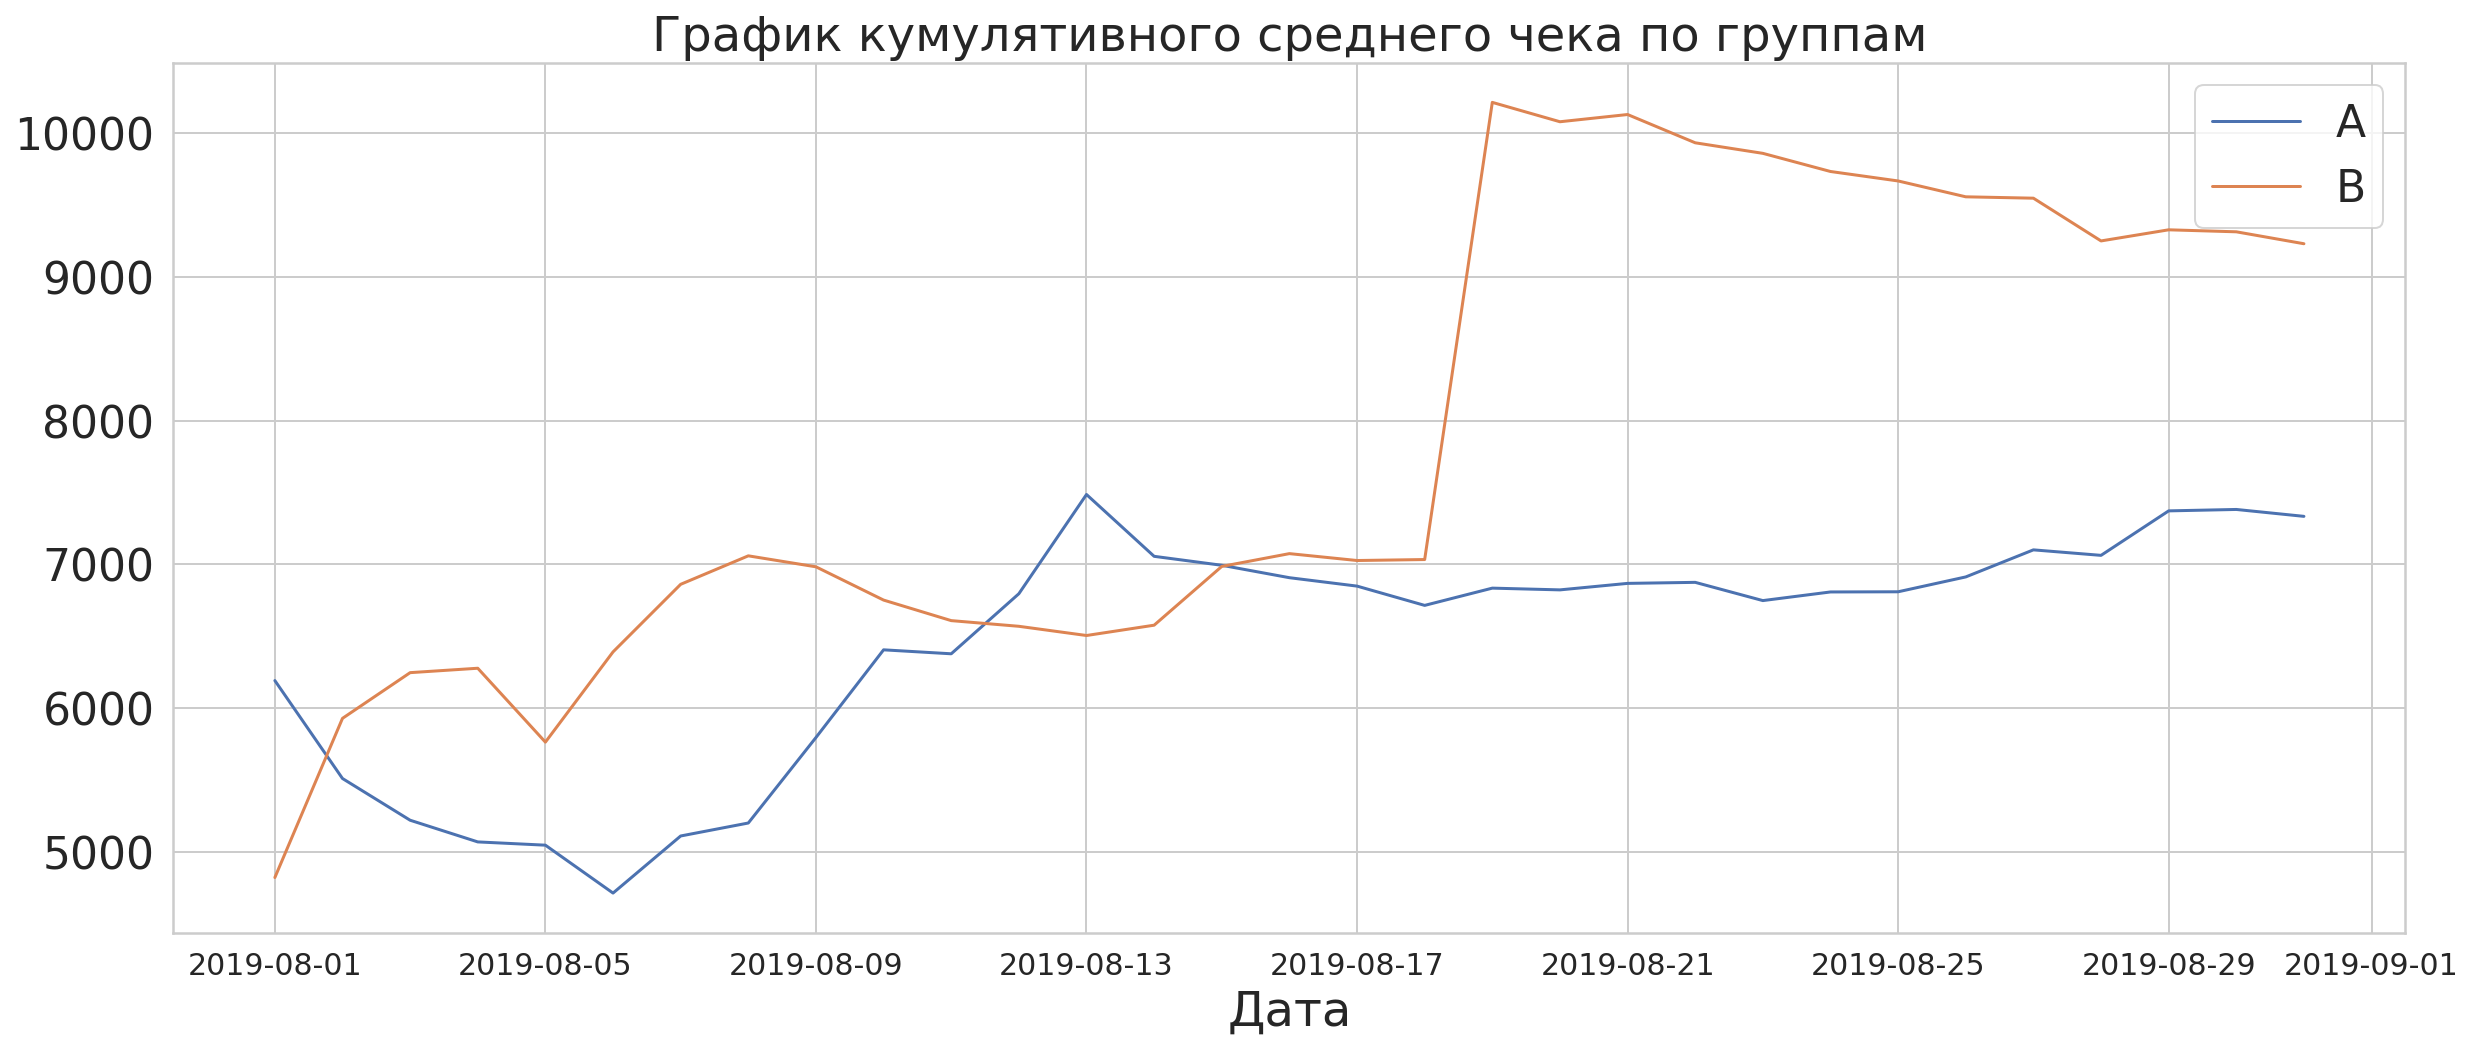

In [20]:
# Строим график среднего чека группы А
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')

# Строим график среднего чека группы В
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График кумулятивного среднего чека по группам')
plt.xlabel('Дата')
plt.legend();

К середине месяца кумулятивное значение среднего чека выросло в обеих группах. Далее 18-19 августа у группы В заметен аномальный рост среднего чека. Скорее всего были крупные заказы, которые повлияли на результаты.

### Построение графика относительного изменения кумулятивного среднего чека группы B к группе A.

Text(0.5, 0, 'Дата')

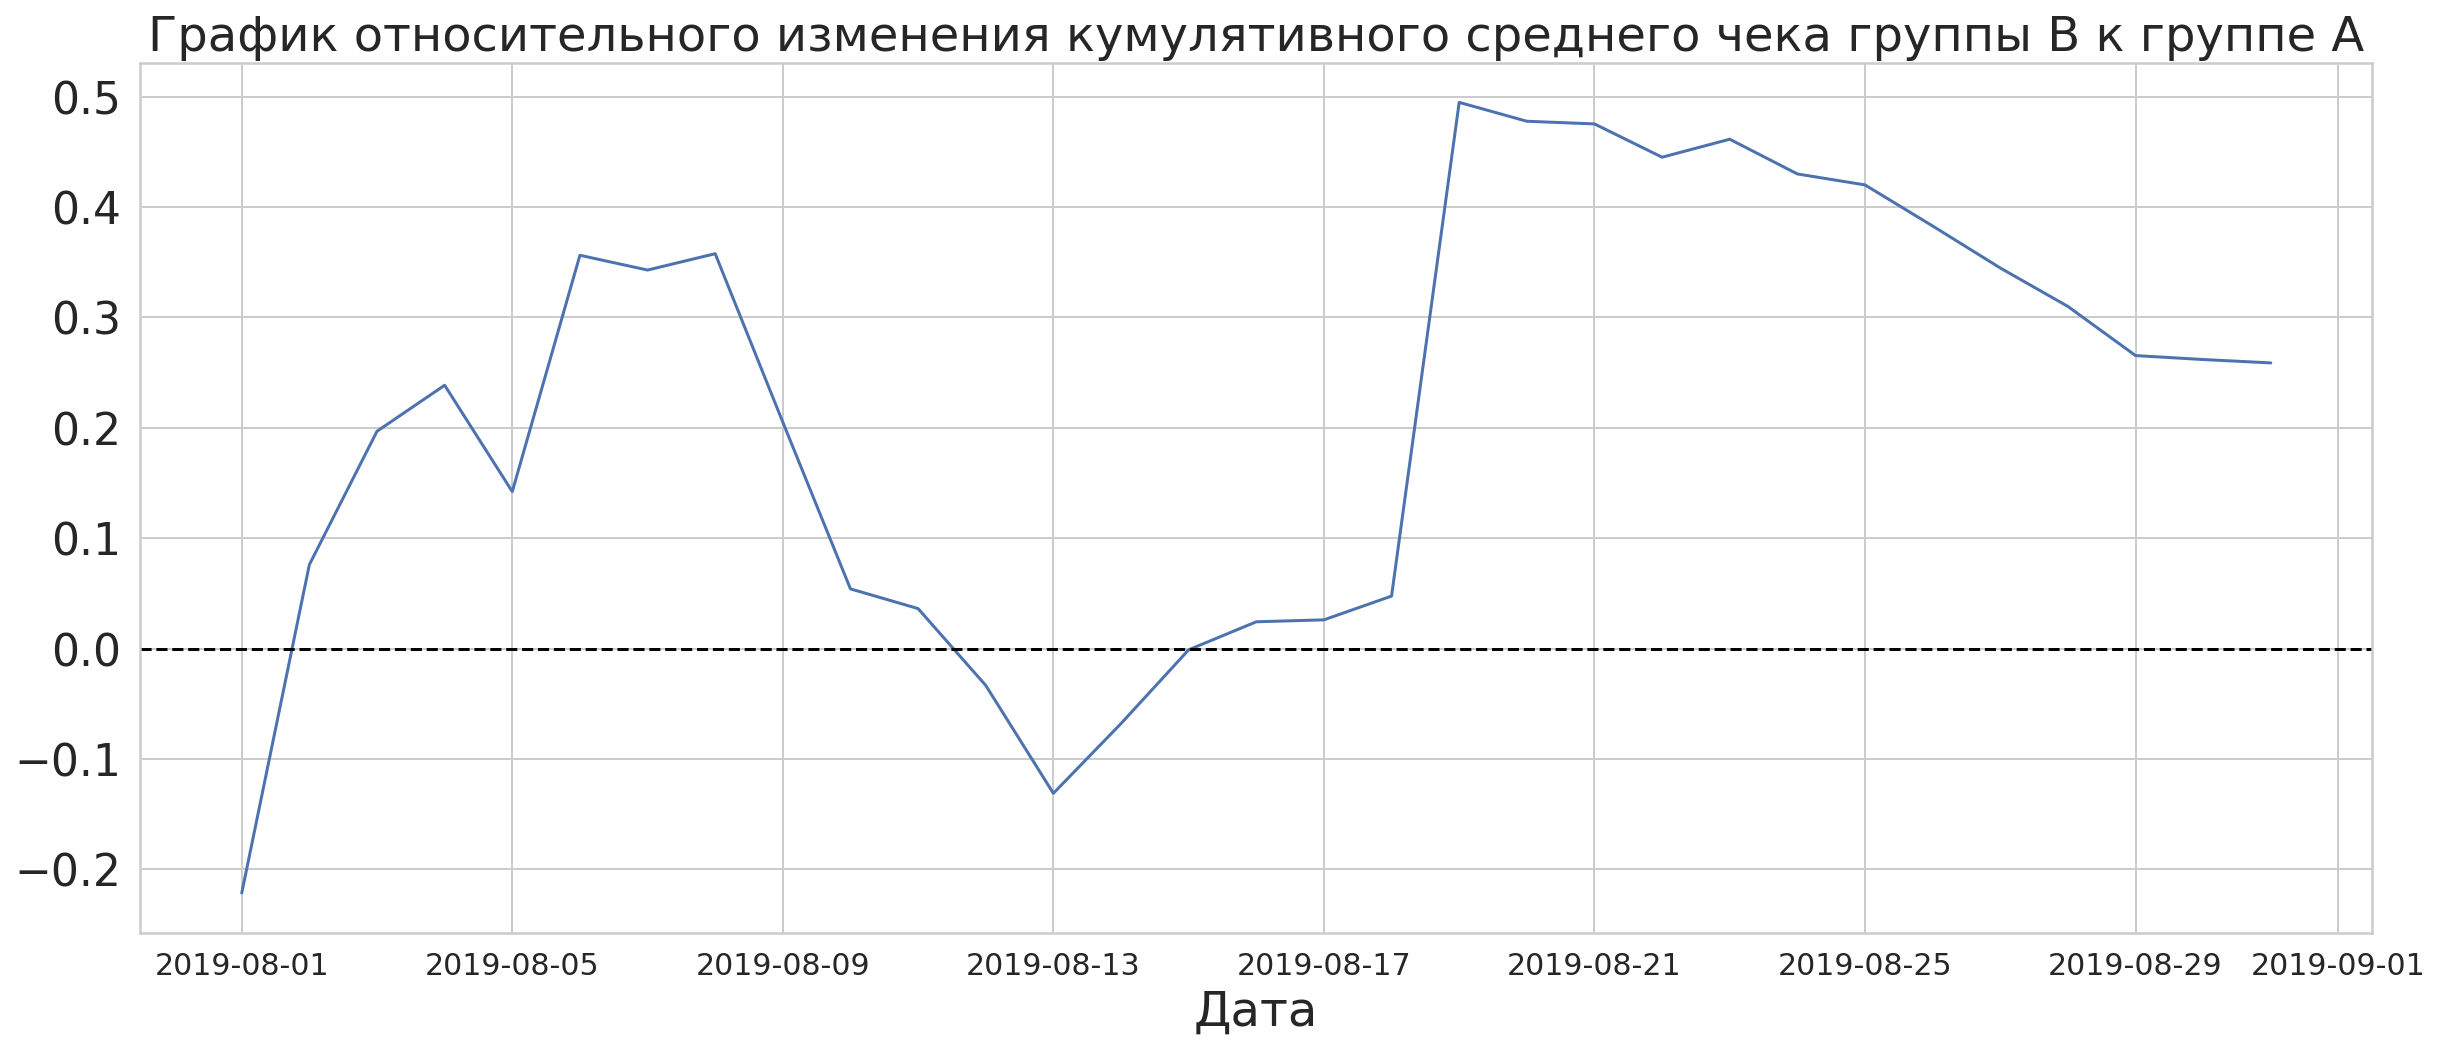

In [21]:
mergedCumulativeRevenue  = cumulativeRevenueA.merge(cumulativeRevenueB, left_on = 'date', 
                                                    right_on = 'date', how='left', suffixes=['A', 'B'])

# cтроим отношение средних чеков
plt.plot(mergedCumulativeRevenue['date'], 
        (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])
         /(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1);

# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--');
plt.tick_params(axis='x', which='major', labelsize=15)

plt.title('График относительного изменения кумулятивного среднего чека группы B к группе A')
plt.xlabel('Дата')

Динамика графика менялась несколько раз в разные даты. 18 августа как раз заметен резкий рост среднего чека группы В

### Построение графика кумулятивного среднего количества заказов на посетителя по группам

Text(0.5, 0, 'Дата')

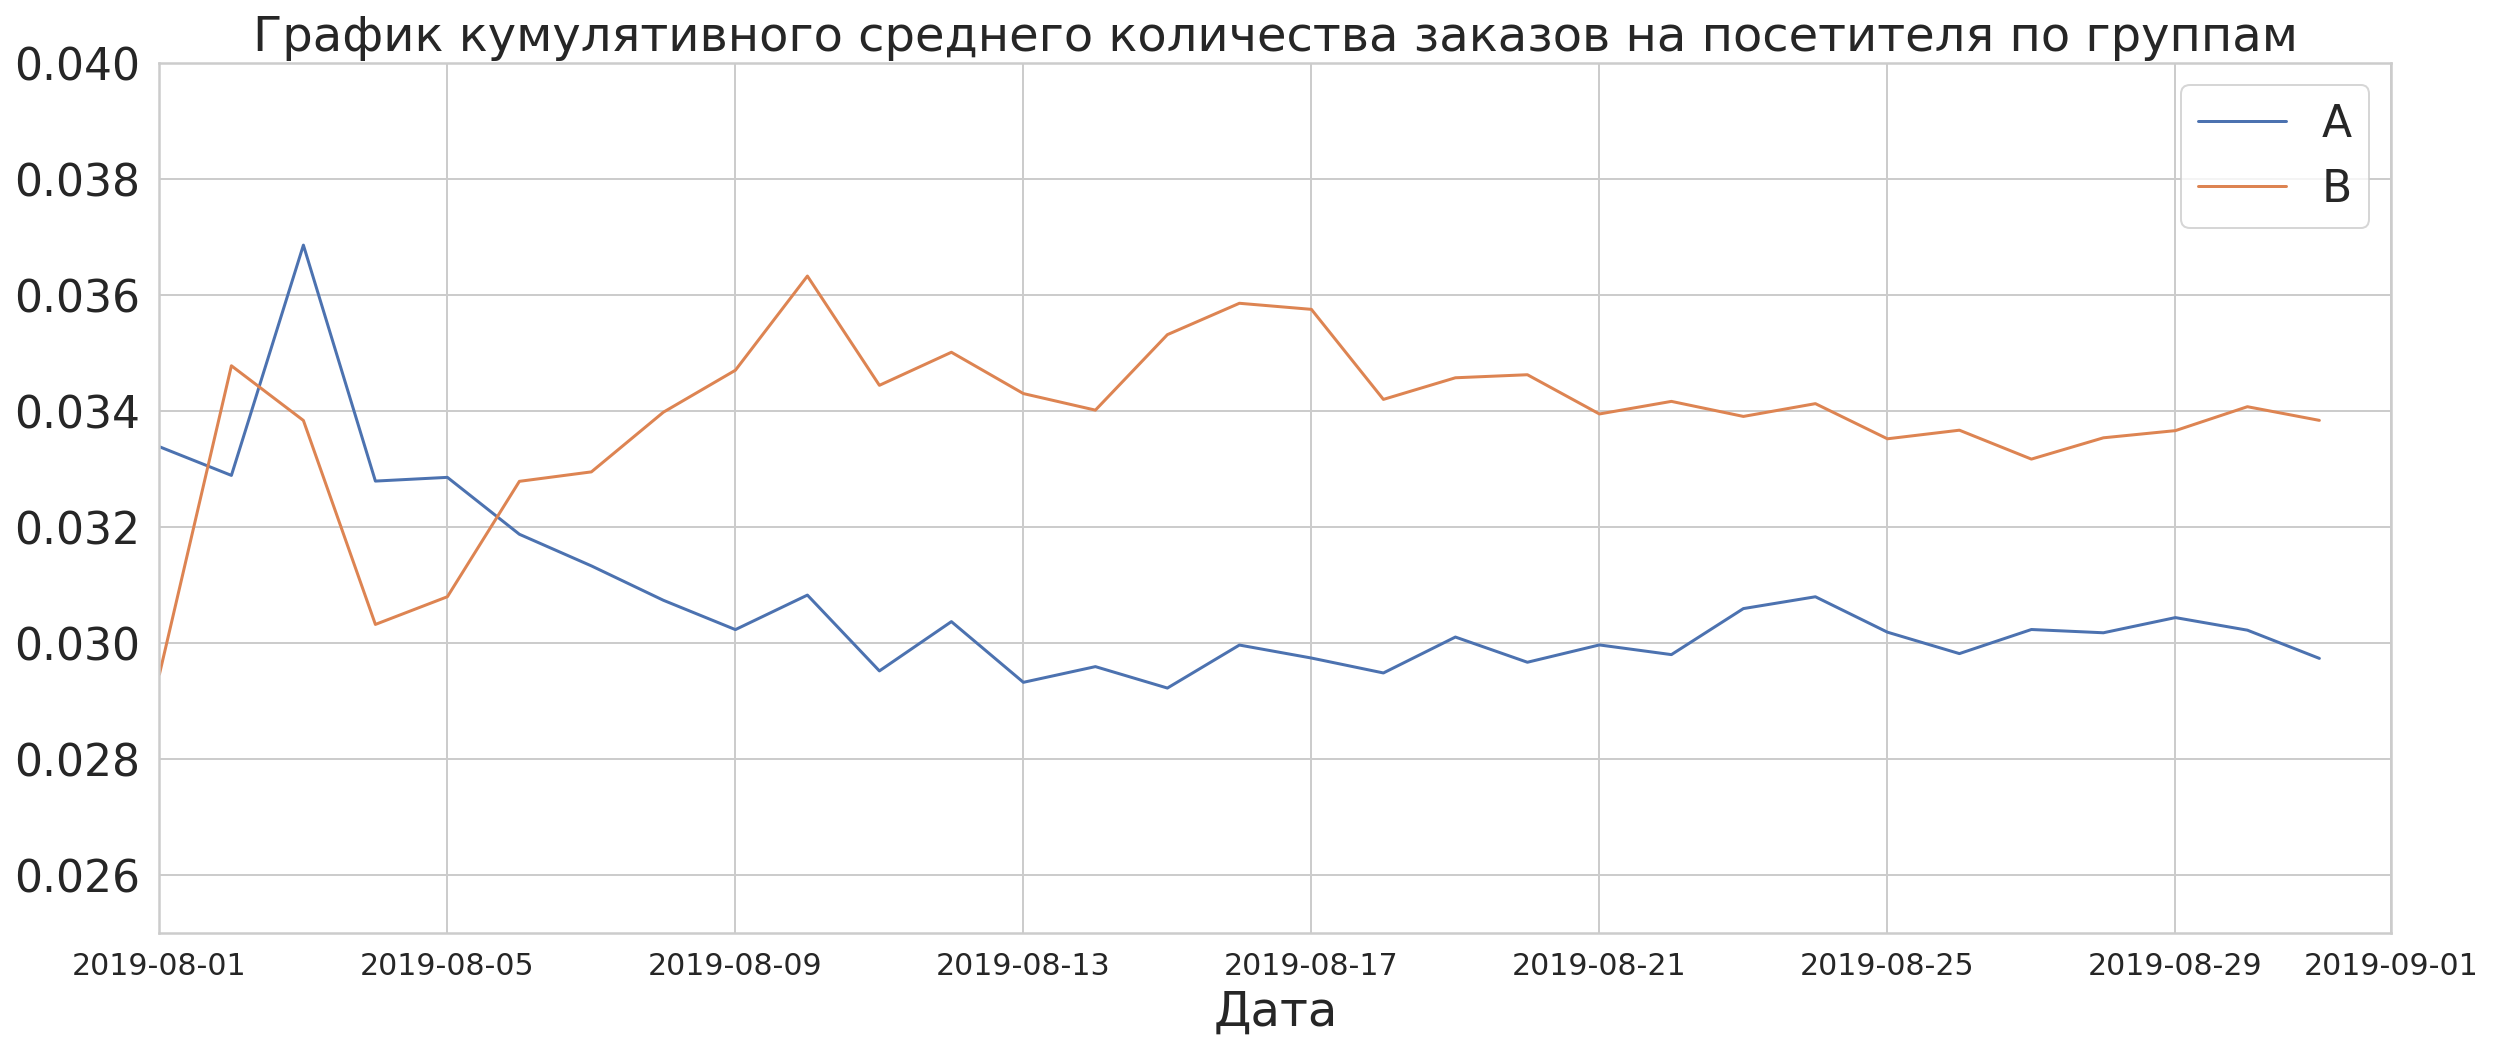

In [22]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

# отделяем данные по группе A
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

# отделяем данные по группе B
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

# строим графики
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=15)

# задаем масштаб осей
plt.axis([dt.datetime(2019, 8, 1), dt.datetime(2019, 9, 1), 0.025, 0.04])

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xlabel('Дата')

По графику видно что среднее количество заказов в целом выше на протяжении всего месяца у группы В. В первые 4 дня заметны скачки по обеим группам. После 11 авгеста графики обеих групп стабилизировались и держались примерно на одном уровне до конца месяца.

### Построение графика относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A

Text(0.5, 0, 'Дата')

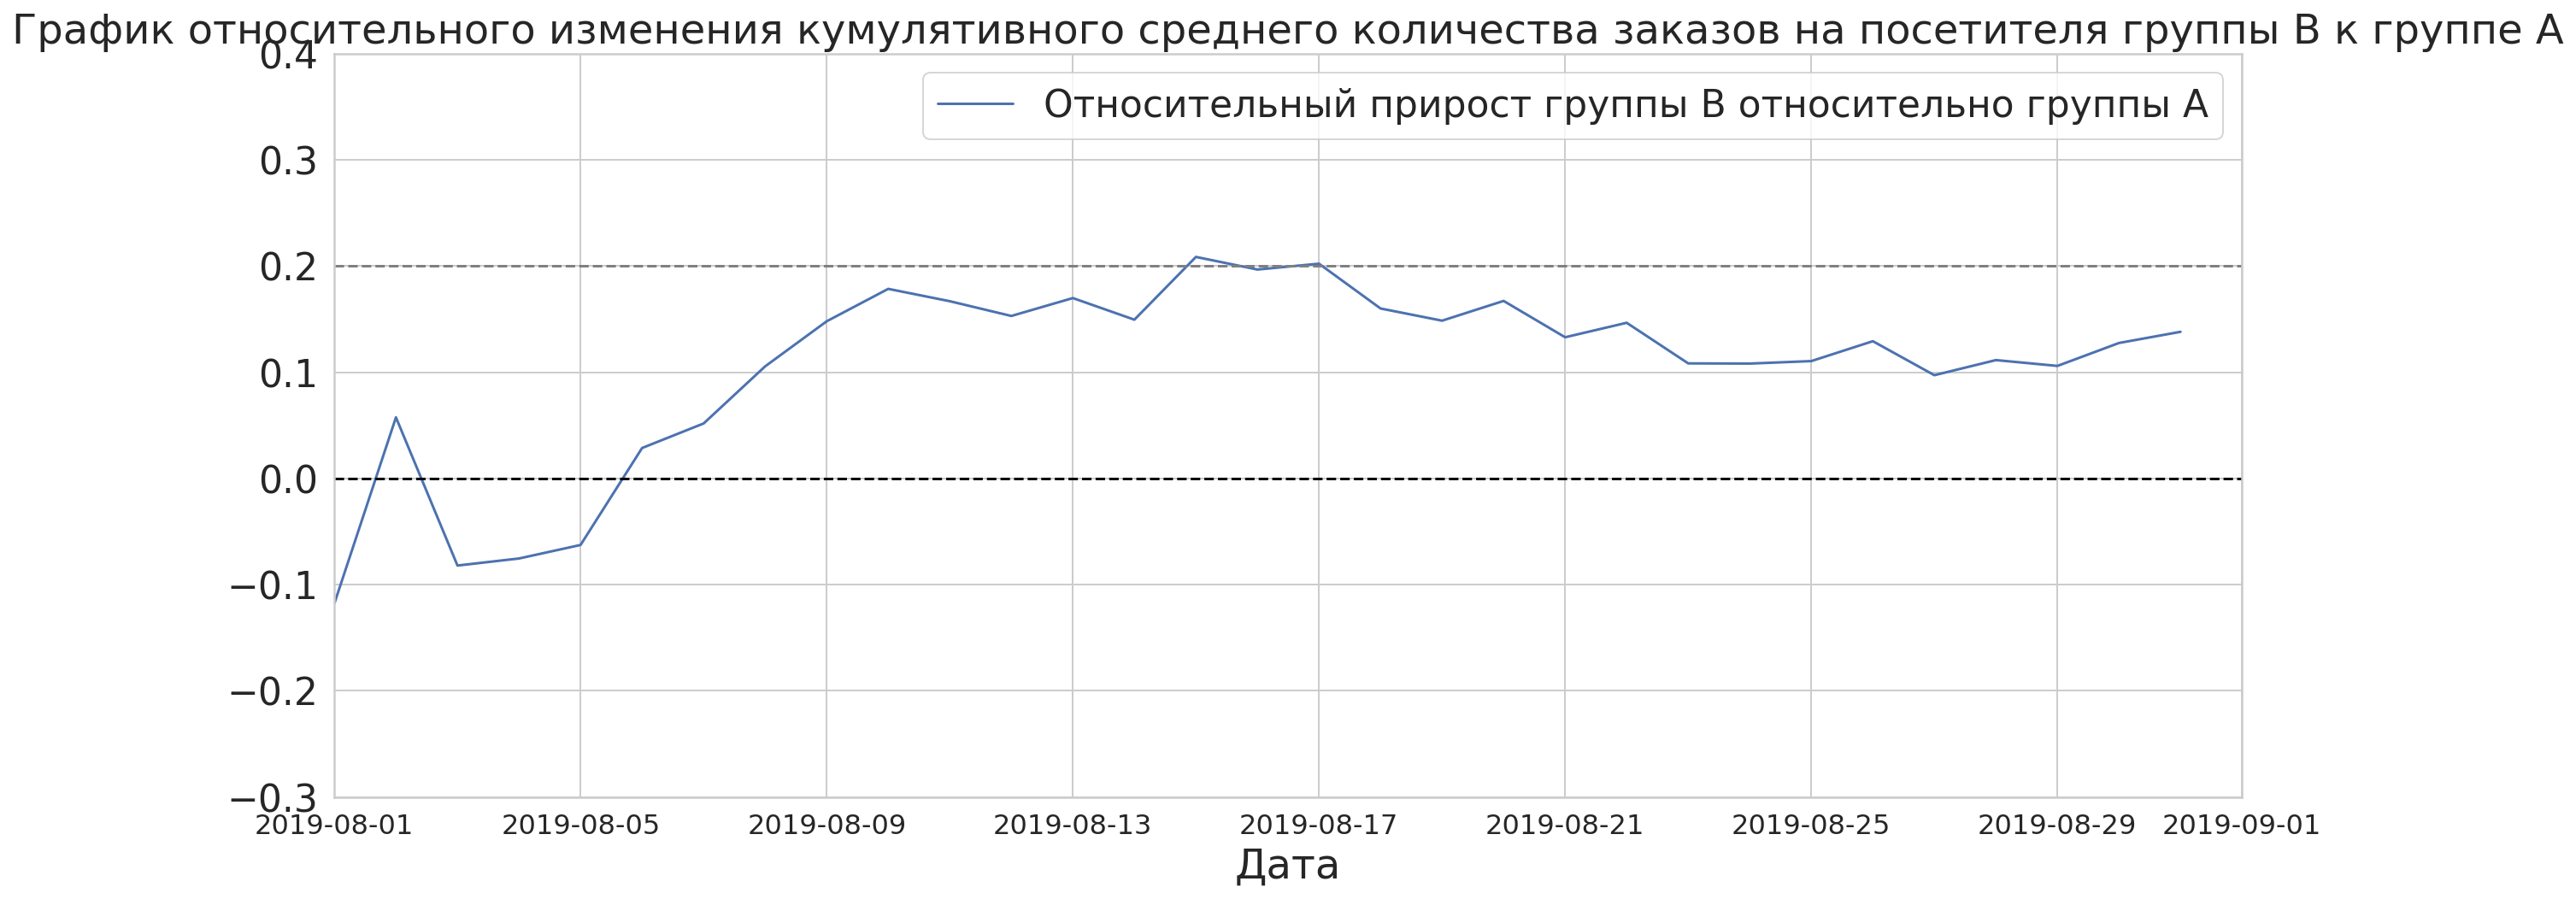

In [23]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], 
                                                                           left_on='date', 
                                                                           right_on='date', 
                                                                           how='left', 
                                                                           suffixes=['A', 'B'])

plt.plot(mergedCumulativeConversions['date'], 
         mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1, 
         label="Относительный прирост группы B относительно группы A")
plt.legend()

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.2, color='grey', linestyle='--')
plt.axis(["2019-08-01", '2019-09-01', -0.3, 0.4])

# размер шрифта по оси x
plt.tick_params(axis='x', which='major', labelsize=16)

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A')
plt.xlabel('Дата')

В начале теста заметен небольшой скачок, но с 6 августа заметен рост группы В. Далее до конца месяца группа В находилась выше группы А.

### Построение точечного графика количества заказов по пользователям

        visitorId  orders
0    5.114589e+06       1
645  2.666468e+09       1
679  2.785527e+09       1
680  2.801638e+09       1
681  2.803209e+09       1
682  2.805132e+09       1
683  2.819073e+09       1
684  2.819364e+09       1
685  2.830871e+09       1
686  2.837914e+09       1


Text(0, 0.5, 'Количество заказов')

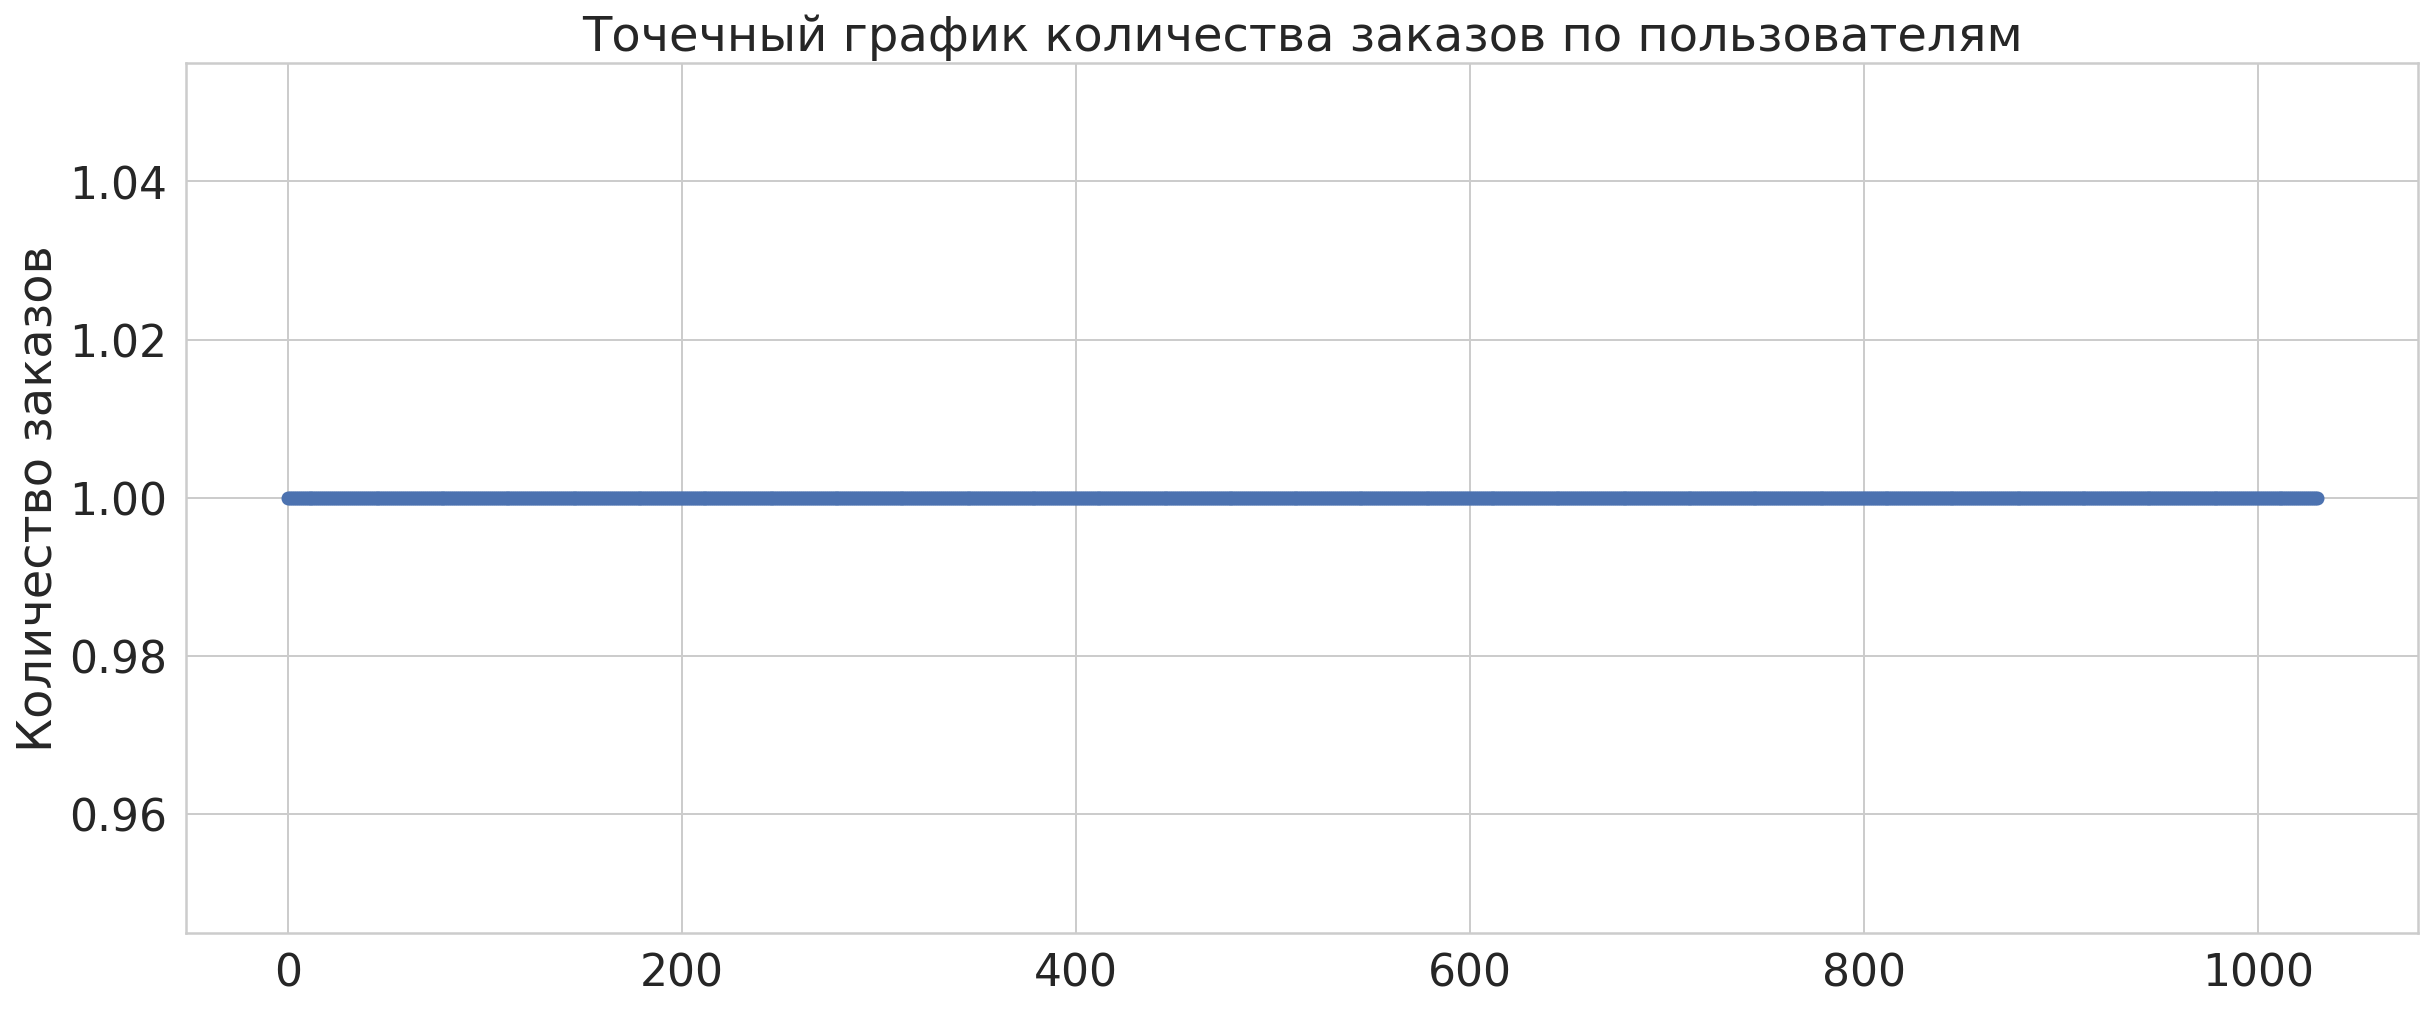

In [24]:
ordersByUsers = (
    orders.groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsers.columns = ['visitorId', 'orders']

print(ordersByUsers.sort_values(by='orders', ascending=False).head(10))

# серия из чисел от 0 до количества наблюдений в ordersByUsers
x_values = pd.Series(range(0, len(ordersByUsers)))
plt.scatter(x_values, ordersByUsers['orders']);

plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

### Расчет 95-й и 99-й перцентилей количества заказов на пользователя

In [25]:
print(np.percentile(ordersByUsers['orders'], [95, 99]))

[1. 1.]


После удаления аномальных заказов мы видим, что в исследовании у нас остались пользователи которые сделали только 1 заказ. 

### Построение точечного графика стоимостей заказов

      transactionId     visitorId       date  revenue group
425       590470918  1.920143e+09 2019-08-19  1294500     B
1196     3936777065  2.108081e+09 2019-08-15   202740     B
858       192721366  1.316130e+09 2019-08-27    93940     A
1136      666610489  1.307669e+09 2019-08-13    92550     A
744      3668308183  8.885125e+08 2019-08-27    86620     B
682      1216533772           NaN 2019-08-29    78990     B
662      1811671147  4.266936e+09 2019-08-29    78990     A
743      3603576309  4.133035e+09 2019-08-09    67990     A
1103     1348774318  1.164614e+09 2019-08-12    66350     A
1099      316924019  1.484273e+08 2019-08-12    65710     A


Text(0, 0.5, 'Стоимость заказа в млн ед.')

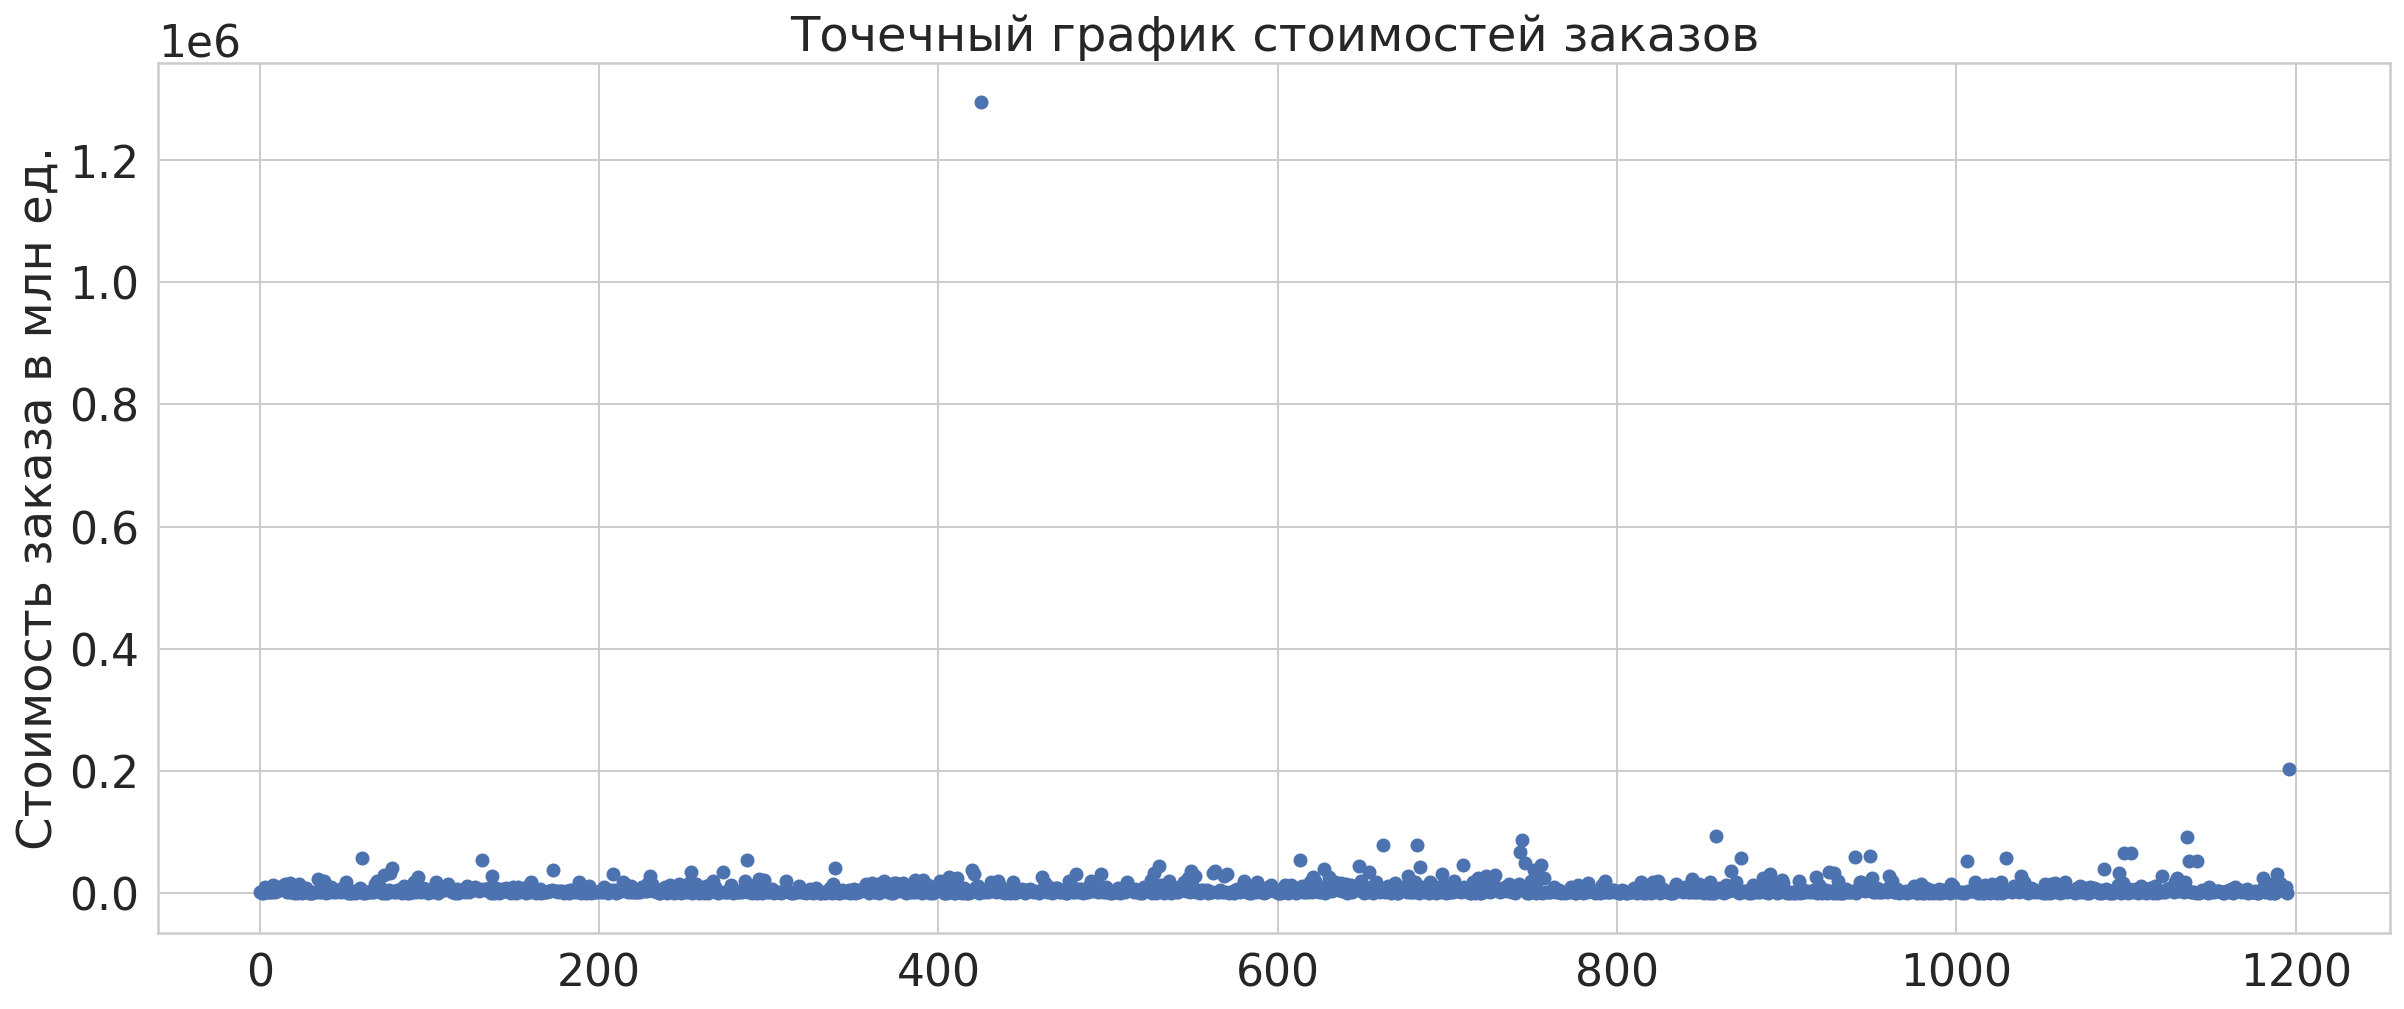

In [26]:
print(orders.sort_values(by='revenue', ascending=False).head(10))

x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue']);
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказа в млн ед.')

На графике виден самый крупный заказ на сумму 1 294 500 ед, также заметен заказ на 202 740 ед - они оба являются аномальными. Все остальные заказы ниже 93 940 ед.

### Расчет 95-й и 99-й перцентилей стоимости заказов

In [27]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более, чем у 5% пользователей чек дороже 28 тыс. ед. Не больше, чем у 1% - дороже 58 233,2 ед. Поэтому заказы выше 28 тыс. ед. будем считать аномальными.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «сырым» данным

Выведем 2 гипотезы:

Нулевая гипотеза(H0): различий в среднем количестве заказов на посетителя между группами нет.

Альтернативная гипотеза(H1): различия в среднем количестве заказов на посетителя между группами есть.

In [28]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsACummulative = visitorsADaily.apply(
    lambda x: visitorsADaily[visitorsADaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateA': 'sum'}
    ),
    axis=1,
)
visitorsACummulative.columns = ['date', 'visitorsCummulativeA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

visitorsBCummulative = visitorsBDaily.apply(
    lambda x: visitorsBDaily[visitorsBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'visitorsPerDateB': 'sum'}
    ),
    axis=1,
)
visitorsBCummulative.columns = ['date', 'visitorsCummulativeB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersACummulative = ordersADaily.apply(
    lambda x: ordersADaily[ordersADaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateA': 'sum', 'revenuePerDateA': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersACummulative.columns = [
    'date',
    'ordersCummulativeA',
    'revenueCummulativeA',
]

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'})
)
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

ordersBCummulative = ordersBDaily.apply(
    lambda x: ordersBDaily[ordersBDaily['date'] <= x['date']].agg(
        {'date': 'max', 'ordersPerDateB': 'sum', 'revenuePerDateB': 'sum'}
    ),
    axis=1,
).sort_values(by=['date'])
ordersBCummulative.columns = [
    'date',
    'ordersCummulativeB',
    'revenueCummulativeB',
]

data = (
    ordersADaily.merge(
        ordersBDaily, left_on='date', right_on='date', how='left'
    )
    .merge(ordersACummulative, left_on='date', right_on='date', how='left')
    .merge(ordersBCummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsACummulative, left_on='date', right_on='date', how='left')
    .merge(visitorsBCummulative, left_on='date', right_on='date', how='left')
)

In [29]:
# для пользователей, совершивших хотя бы 1 заказ, будет указано число заказов
ordersByUsersA = (
    orders[orders['group'] == 'A']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersA.columns = ['userId', 'orders']

ordersByUsersB = (
    orders[orders['group'] == 'B']
    .groupby('visitorId', as_index=False)
    .agg({'transactionId': pd.Series.nunique})
)
ordersByUsersB.columns = ['userId', 'orders'] 

# пользователям с заказами будет соответствовать число заказов пользователя, а пользователям без заказов — нули
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("{0:.5f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

0.01629
0.159


Вероятность получения наблюдаемых результатов p-value = 0.01679, это меньше 0.05. Значит, отвергаем нулевую гипотезу о том, что статистически значимых различий в среднем количестве заказов на посетителя между группами нет. Относительный прирост группы В к конверсии группы А равен 15,9%

### Расчет статистической значимости различий в среднем чеке заказа между группами по «сырым» данным

Выведем 2 гипотезы: 

Нулевая гипотеза: различий в среднем чеке между группами нет.

Альтернативная гипотеза: различия в среднем чеке между группами есть.

In [30]:
print('{0:.3f}'.format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], 
                                          orders[orders['group']=='B']['revenue'])[1]))
print('{0:.3f}'.format(orders[orders['group']=='B']['revenue']
                       .mean()/orders[orders['group']=='A']['revenue']
                       .mean()-1)) 

0.729
0.259


P-value = 0.729. Это гораздо больше 0,05. Наблюдаемое различие среднего чека между сегментами в 25,9% не является статистически значимым. Нулевую гипотезу не отвергаем.

### Расчет статистической значимости различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.

In [31]:
# срезы пользователей
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 2]['userId'],
        ordersByUsersB[ordersByUsersB['orders'] > 2]['userId'],
    ],
    axis=0,
)

# срезы пользователей
revenue_lim = 28000
usersWithExpensiveOrders = orders[orders['revenue'] > revenue_lim]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)

За аномальных пользователей были приняты те, кто совершил 3 заказа и более, или совершил заказ на сумму свыше 28 000 ед.

In [32]:
sampleAFiltered = pd.concat(
    [
        ordersByUsersA[
            np.logical_not(ordersByUsersA['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

sampleBFiltered = pd.concat(
    [
        ordersByUsersB[
            np.logical_not(ordersByUsersB['userId'].isin(abnormalUsers))
        ]['orders'],
        pd.Series(
            0,
            index=np.arange(
                data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])
            ),
            name='orders',
        ),
    ],
    axis=0,
)

print('{0:.5f}'.format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.01902
0.160


p-value не превысил 0,05. Сегмент В оказался лучше по конверсии на 16%, еще лучше, чем до "очистки" данных.
Нулевую гипотезу отвергаем.

### Расчет статистической значимости различий в среднем чеке заказа между группами по «очищенным» данным. 

In [33]:
print(
    '{0:.3f}'.format(
        stats.mannwhitneyu(
            orders[
                np.logical_and(
                    orders['group'] == 'A',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
            orders[
                np.logical_and(
                    orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),
                )
            ]['revenue'],
        )[1]
    )
)

print(
    "{0:.3f}".format(
        orders[
            np.logical_and(
                orders['group'] == 'B',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        / orders[
            np.logical_and(
                orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),
            )
        ]['revenue'].mean()
        - 1
    )
)

0.906
-0.017


P-value = 0,906, это гораздо больше 0,05. Наблюдаемое различие среднего чека между группами в 1,7% не является статистически значимым. Нулевую гипотезу не отвергаем.

# Вывод

Судя по рафику различия среднего количества заказов на посетителя между группами можно сказать, что результаты группы B лучше группы A: зафиксировались около среднего значения.

График различия среднего чека сильно колеблется, что свидетельствует о наличии аномалиий.

По итогам тестирования было выявлено статистически значимое различие по среднему количеству заказов на посетителя между группами как по «сырым», так и по данным после фильтрации аномалий, а вот статистически значимых различий по среднему чеку не были зафиксированы в обоих случаях.

Исходя из обнаруженных фактов, тест следует остановить и зафиксировать победу группы В.
Ее результаты по конверсии оказались лучше группы А на 15,9% до "очистки" данных и на 16% после "очистки" данных.